 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("stockdata/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv,parse_dates=[0])
#pd.to_datetime(whale_returns['Date'])
whale_returns.sort_index(inplace=True, ascending=True)
whale_returns.set_index('Date', inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_clean = whale_returns.dropna()
whale_returns_clean.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("stockdata/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv,parse_dates=[0])
algo_returns.sort_index(inplace=True, ascending=True)
algo_returns.set_index('Date', inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_clean = algo_returns.dropna()
algo_returns_clean.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("stockdata/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv,parse_dates=[0])
#setting the index to the date and inverting the sort to match rest of my dataframes
sp500_history.sort_index(inplace=True, ascending=False)
sp500_history.set_index('Date', inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
Close    1649 non-null object
dtypes: object(1)
memory usage: 25.8+ KB


In [11]:
# Fix data types by removing the $ and making a float
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
Close    1649 non-null float64
dtypes: float64(1)
memory usage: 25.8 KB


In [12]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_daily_returns.dropna().head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename Column
sp500_daily_returns.columns = ['S&P 500']
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
joined_stock_data = pd.concat([whale_returns_clean, algo_returns_clean ,sp500_daily_returns], axis="columns", join="inner")
joined_stock_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

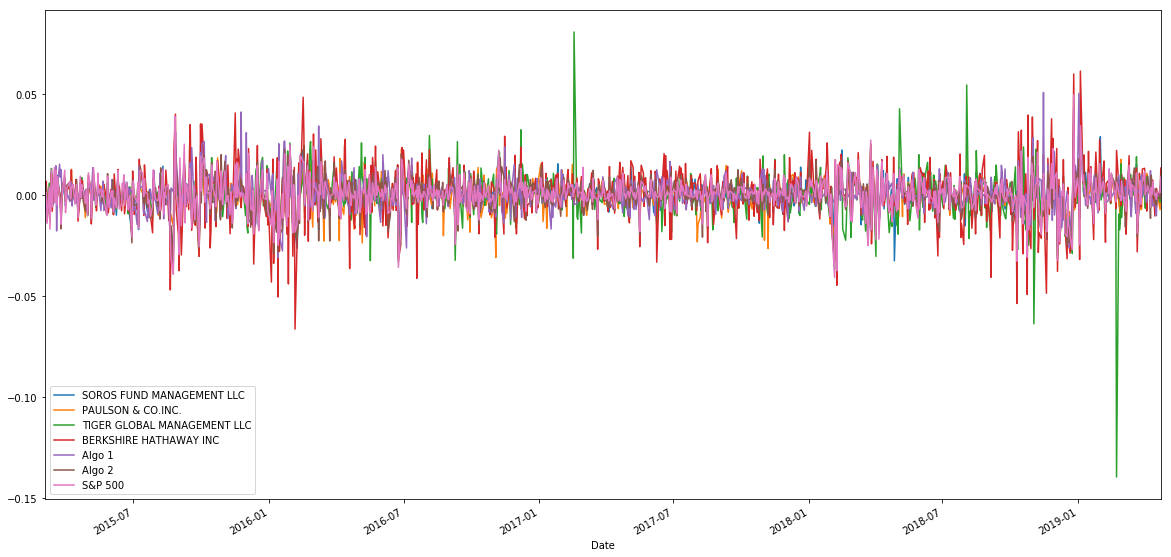

In [16]:
# Plot daily returns
joined_stock_data.plot(figsize=(20,10))

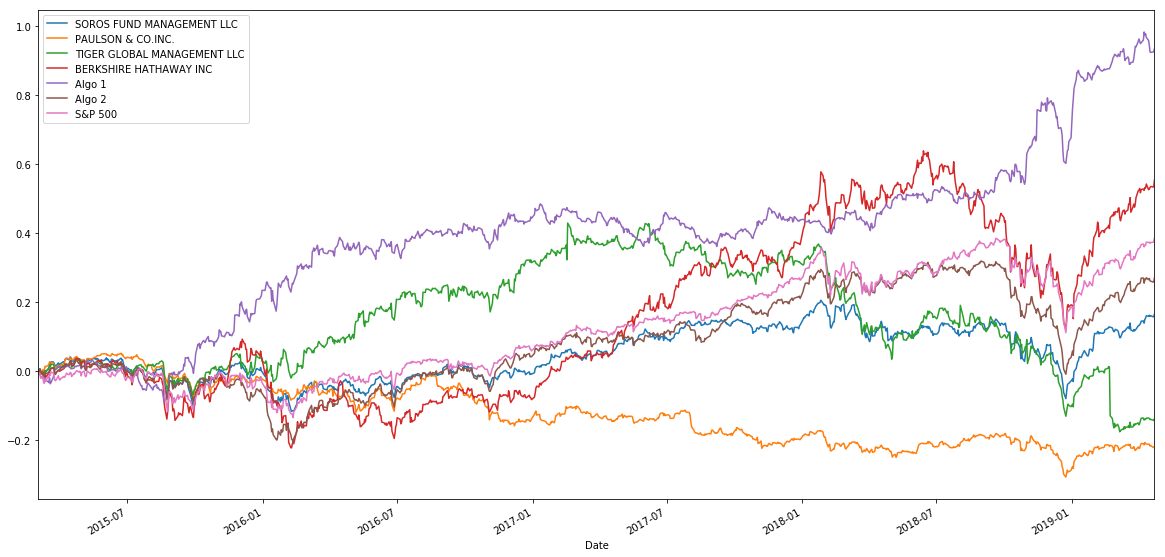

In [17]:
# Plot cumulative returns
cumulative_returns = (1+ joined_stock_data).cumprod() - 1
cumulative_returns.plot(figsize=(20,10))

---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [18]:
# Returns by Year
yearly_returns = cumulative_returns.groupby(
    [cumulative_returns.index.year]
).last()

yearly_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015,-0.003019,-0.023685,0.027644,0.034440,0.233385,-0.065759,-0.034689
2016,-0.009988,-0.139999,0.313529,-0.084044,0.442259,0.040505,0.057354
2017,0.132646,-0.199981,0.312875,0.366205,0.437603,0.209602,0.262691
2018,-0.029727,-0.289035,-0.104334,0.191207,0.676020,0.038525,0.183934
2019,0.164568,-0.220354,-0.138811,0.553401,0.934691,0.269247,0.385517


In [19]:
# Top Portfolio returns for 2017
ticker_data_slice_2017 = yearly_returns.loc[2017]
ticker_data_slice_2017.sort_values(ascending=False)

Algo 1                         0.437603
BERKSHIRE HATHAWAY INC         0.366205
TIGER GLOBAL MANAGEMENT LLC    0.312875
S&P 500                        0.262691
Algo 2                         0.209602
SOROS FUND MANAGEMENT LLC      0.132646
PAULSON & CO.INC.             -0.199981
Name: 2017, dtype: float64

In [20]:
# Returns by Month

# End of Month Returns
last_of_month_ret = cumulative_returns.groupby(
    [cumulative_returns.index.year, cumulative_returns.index.month]
).last()

# Calculate the monthly returns
monthly_returns = last_of_month_ret / last_of_month_ret.shift() - 1

monthly_returns.index.names = ["Year", "Month"]
monthly_returns.tail()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Year Month                                                  
2018 12                     -1.407745            0.328380   
2019 1                      -4.236023           -0.213102   
     2                       0.189052           -0.028988   
     3                       0.051228            0.037408   
     4                       0.368646           -0.038217   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Year Month                                                                  
2018 12                       -3.249679               -0.380544 -0.126441   
2019 1                        -1.045299                1.028313  0.272616   
     2                       -33.384423                0.165806  0.067069   
     3                         0.011938                0.110988  0.023443   
     4                        -0.103783                0.101708 -0.005155   

              Algo 2   S&P 500  
Year Month                      
2018 12    -0.784893 -0.394101  
2019 1      3.385710  0.506470  
     2      0.259732  0.137018  
     3      0.146157  0.074816  
     4      0.103677  0.138464

In [21]:
# Top Portfolio Returns for December 2018
ticker_data_slice_dec18 = monthly_returns.loc[2018,12]
ticker_data_slice_dec18.sort_values(ascending=False)

PAULSON & CO.INC.              0.328380
Algo 1                        -0.126441
BERKSHIRE HATHAWAY INC        -0.380544
S&P 500                       -0.394101
Algo 2                        -0.784893
SOROS FUND MANAGEMENT LLC     -1.407745
TIGER GLOBAL MANAGEMENT LLC   -3.249679
Name: (2018, 12), dtype: float64

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

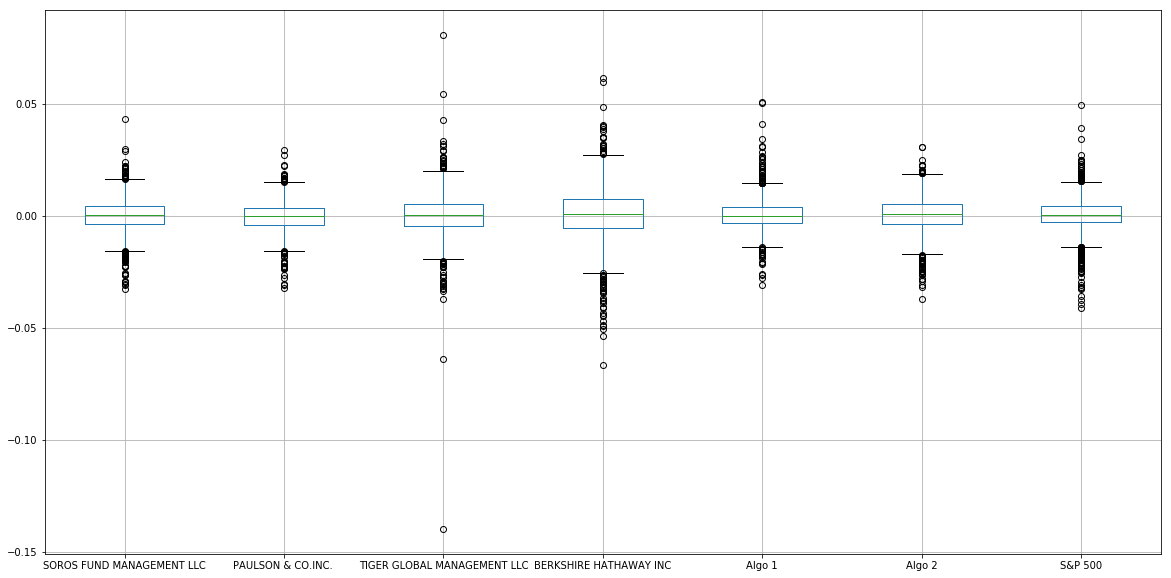

In [22]:
# Box plot to visually show risk
joined_stock_data.boxplot(figsize=(20,10))

In [23]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
import numpy as np
np.std(joined_stock_data)

SOROS FUND MANAGEMENT LLC      0.007892
PAULSON & CO.INC.              0.007020
TIGER GLOBAL MANAGEMENT LLC    0.010889
BERKSHIRE HATHAWAY INC         0.012912
Algo 1                         0.007617
Algo 2                         0.008338
S&P 500                        0.008550
dtype: float64

In [24]:
# Determine which portfolios are riskier than the S&P 500
np.std(joined_stock_data) > np.std(joined_stock_data['S&P 500'])

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [25]:
# Calculate the annualized standard deviation (252 trading days)
joined_stock_data.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

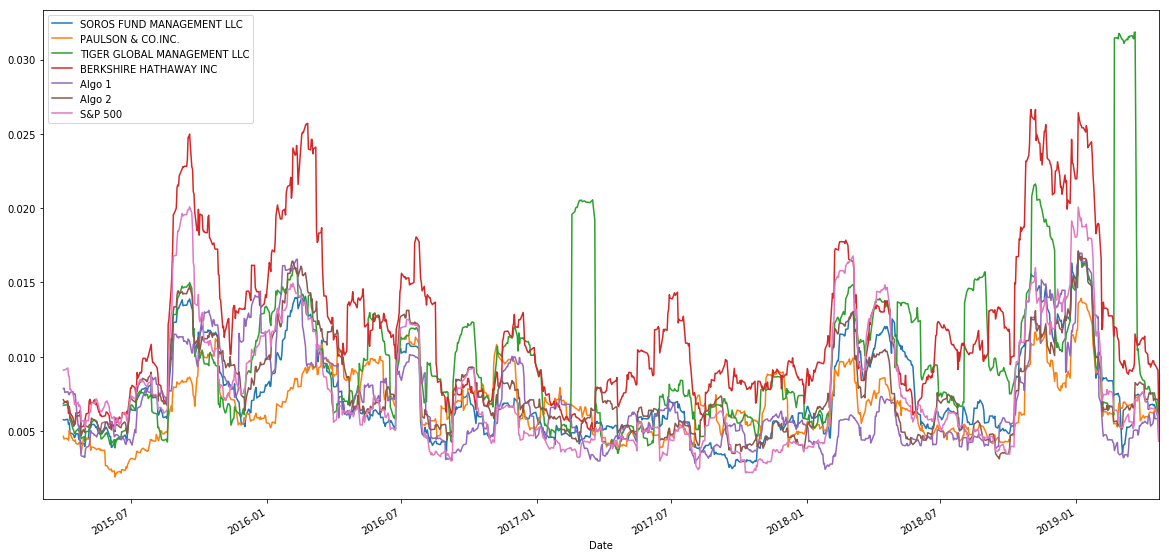

In [26]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
#Used the underlying closing price data in my joined df to calculate this
joined_stock_data.rolling(window=21).std().plot(figsize=(20,10))

In [27]:
# Correlation
joined_stock_data.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [35]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = joined_stock_data['Algo 1'].cov(joined_stock_data['S&P 500'])
variance = joined_stock_data['S&P 500'].var()
beta = covariance / variance
beta

0.24899091459425748

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

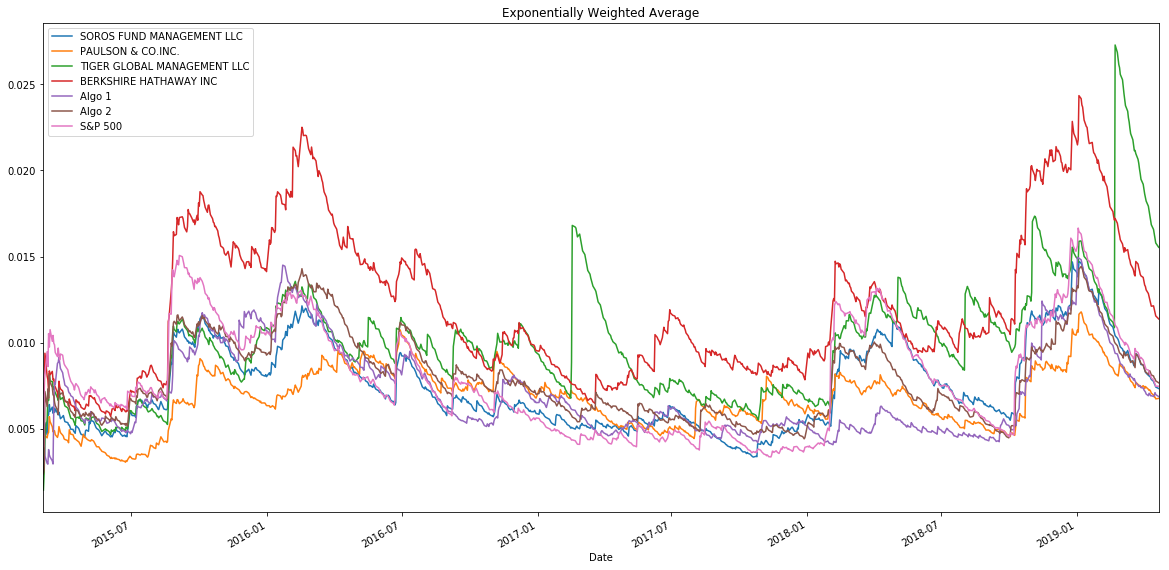

In [28]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [36]:
# Annualzied Sharpe Ratios
sharpe_ratios = (joined_stock_data.mean() * 252) / (joined_stock_data.std() * np.sqrt(252))
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

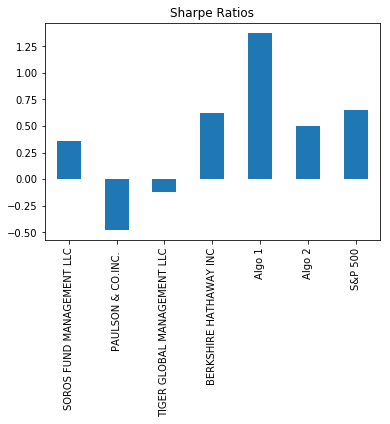

In [37]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [53]:
# Read the first stock
google_csv = Path("stockdata/goog.csv")
google_returns = pd.read_csv(google_csv,parse_dates=[0])
google_returns.sort_index(inplace=True, ascending=True)
google_returns.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)
google_returns.set_index('Date', inplace=True)
google_returns.columns = ['GOOG']
google_returns.head()

,GOOG
Date,
2018-08-24,1220.650024
2018-08-27,1241.819946
2018-08-28,1231.150024
2018-08-29,1249.300049
2018-08-30,1239.119995


In [54]:
# Read the second stock
steel_csv = Path("stockdata/x.csv")
steel_returns = pd.read_csv(steel_csv,parse_dates=[0])
steel_returns.sort_index(inplace=True, ascending=True)
steel_returns.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)
steel_returns.set_index('Date', inplace=True)
steel_returns.columns = ['X']
steel_returns.head()

,X
Date,
2018-08-24,30.950001
2018-08-27,30.660000
2018-08-28,30.799999
2018-08-29,30.770000
2018-08-30,29.410000


In [55]:
# Read the third stock
exxon_csv = Path("stockdata/xom.csv")
exxon_returns = pd.read_csv(exxon_csv,parse_dates=[0])
exxon_returns.sort_index(inplace=True, ascending=True)
exxon_returns.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)
exxon_returns.set_index('Date', inplace=True)
exxon_returns.columns = ['XOM']
exxon_returns.head()

,XOM
Date,
2018-08-24,79.620003
2018-08-27,80.400002
2018-08-28,80.279999
2018-08-29,80.860001
2018-08-30,80.510002


In [57]:
# Concatenate all stocks into a single DataFrame
joined_custom_stock_data = pd.concat([exxon_returns,steel_returns,google_returns], axis="columns", join="inner")
joined_custom_stock_data.head()

,XOM,X,GOOG
Date,,,
2018-08-24,79.620003,30.950001,1220.650024
2018-08-27,80.400002,30.660000,1241.819946
2018-08-28,80.279999,30.799999,1231.150024
2018-08-29,80.860001,30.770000,1249.300049
2018-08-30,80.510002,29.410000,1239.119995


In [58]:
# Reset the index
#done already

In [59]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
#done already

In [62]:
# Drop Nulls
joined_custom_stock_data = joined_custom_stock_data.dropna()
joined_custom_stock_data.head()

,XOM,X,GOOG
Date,,,
2018-08-24,79.620003,30.950001,1220.650024
2018-08-27,80.400002,30.660000,1241.819946
2018-08-28,80.279999,30.799999,1231.150024
2018-08-29,80.860001,30.770000,1249.300049
2018-08-30,80.510002,29.410000,1239.119995


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [97]:
# Calculate weighted portfolio returns
custom_returns = joined_custom_stock_data.pct_change()
weights = [1/3, 1/3, 1/3]
portfolio_returns = custom_returns.dot(weights)
portfolio_returns.head()

Date
2018-08-24         NaN
2018-08-27    0.005923
2018-08-28   -0.001840
2018-08-29    0.006998
2018-08-30   -0.018892
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [99]:
# YOUR CODE HERE
custom_plus_portfolio = pd.concat([portfolio_returns, joined_stock_data], axis="columns", join="inner")
custom_plus_portfolio.columns = ['Custom', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY','Algo 1','Algo 2','S&P 500']
custom_plus_portfolio.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-08-24,NaN,0.006674,0.004229,0.004691,0.012350,0.000648,0.002828,0.006199
2018-08-27,0.005923,0.005238,0.001996,0.008639,0.019590,-0.000678,0.001447,0.007670
2018-08-28,-0.001840,0.000646,0.001236,-0.006537,-0.005677,-0.004257,0.000831,0.000269
2018-08-29,0.006998,0.003578,0.002776,0.006234,0.001879,-0.002434,0.003543,0.005701
2018-08-30,-0.018892,-0.007328,-0.001927,-0.016174,-0.013139,-0.002636,-0.001224,-0.004430


In [102]:
# Only compare dates where the new, custom portfolio has dates
clean_total = custom_plus_portfolio.dropna()
clean_total.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-08-27,0.005923,0.005238,0.001996,0.008639,0.019590,-0.000678,0.001447,0.007670
2018-08-28,-0.001840,0.000646,0.001236,-0.006537,-0.005677,-0.004257,0.000831,0.000269
2018-08-29,0.006998,0.003578,0.002776,0.006234,0.001879,-0.002434,0.003543,0.005701
2018-08-30,-0.018892,-0.007328,-0.001927,-0.016174,-0.013139,-0.002636,-0.001224,-0.004430
2018-08-31,-0.003978,0.003072,0.000752,0.003118,-0.000410,0.004277,0.004151,0.000134


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [103]:
# Risk ... calculating the standard deviation of the portfolio
clean_total.std() * np.sqrt(252)

Custom                         0.244974
SOROS FUND MANAGEMENT LLC      0.165294
PAULSON & CO.INC.              0.130529
TIGER GLOBAL MANAGEMENT LLC    0.256424
BERKSHIRE HATHAWAY             0.276961
Algo 1                         0.153198
Algo 2                         0.157175
S&P 500                        0.173809
dtype: float64

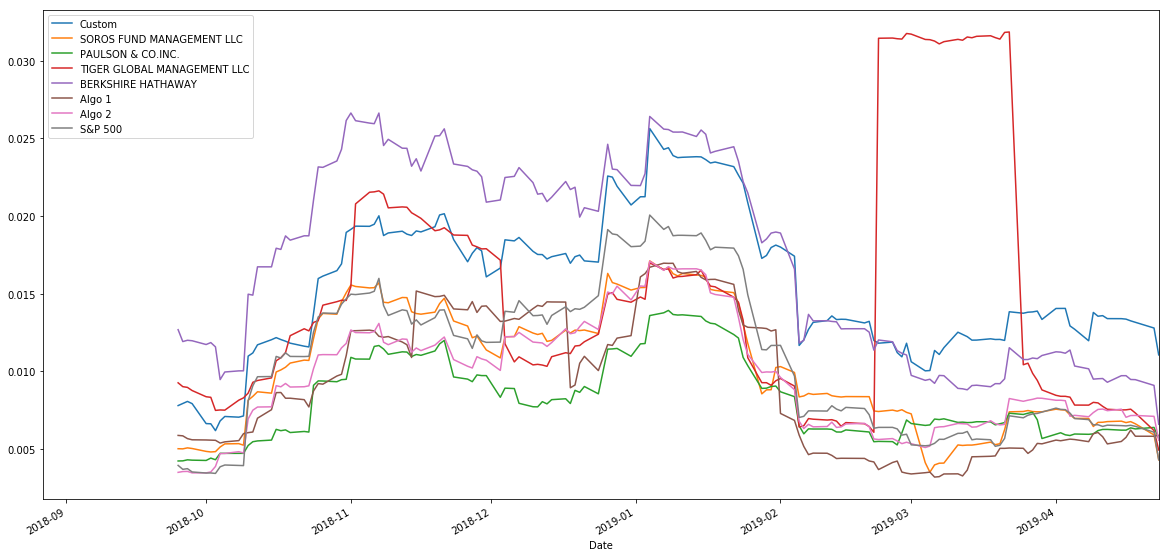

In [104]:
# Rolling
clean_total.rolling(window=21).std().plot(figsize=(20,10))

In [108]:
# Beta
covariance = clean_total['Custom'].cov(joined_stock_data['S&P 500'])
variance = clean_total['S&P 500'].var()
beta = covariance / variance
beta

1.18748065137235

In [110]:
# Annualzied Sharpe Ratios
sharpe_ratios = (clean_total.mean() * 252) / (clean_total.std() * np.sqrt(252))
sharpe_ratios

Custom                        -0.991594
SOROS FUND MANAGEMENT LLC      0.351683
PAULSON & CO.INC.             -0.391517
TIGER GLOBAL MANAGEMENT LLC   -1.574263
BERKSHIRE HATHAWAY             0.345553
Algo 1                         2.550524
Algo 2                        -0.208288
S&P 500                        0.265970
dtype: float64

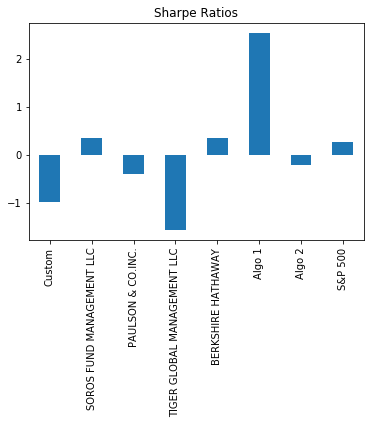

In [112]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [113]:
# YOUR CODE HERE
clean_total.corr()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY,Algo 1,Algo 2,S&P 500
Custom,1.000000,0.791723,0.701214,0.361198,0.788430,0.408095,0.810599,0.842519
SOROS FUND MANAGEMENT LLC,0.791723,1.000000,0.813987,0.489490,0.842530,0.379409,0.878552,0.893035
PAULSON & CO.INC.,0.701214,0.813987,1.000000,0.482444,0.689355,0.428631,0.816183,0.787425
TIGER GLOBAL MANAGEMENT LLC,0.361198,0.489490,0.482444,1.000000,0.350991,0.164686,0.402737,0.488903
BERKSHIRE HATHAWAY,0.788430,0.842530,0.689355,0.350991,1.000000,0.378645,0.804182,0.867910
Algo 1,0.408095,0.379409,0.428631,0.164686,0.378645,1.000000,0.429617,0.337397
Algo 2,0.810599,0.878552,0.816183,0.402737,0.804182,0.429617,1.000000,0.891336
S&P 500,0.842519,0.893035,0.787425,0.488903,0.867910,0.337397,0.891336,1.000000
